**Data definition:**

The dataset contains information on mobile phone sales of a US based ecommerce online start up company from year 2023 and 2024

**Data description:**

Customer_id: Unique identifier of a customer

Brand_name: Mobile phone brand names

Screen_size: the diagonal length of mobile phone

Battery_capacity: The amount of battery power available to run the mobile phone

Ram_size: the temporary memory size in mobile phone to run applications

Storage_capacity: the permanent memory size in mobile phone to run applications

Purchase_date: The date of customer purchase

Price: The price of the mobile phone

Payment_type: Describes how customer pays

Units_sold: The no of units sold  


# Exploratory Data Analysis

### Import foundational libraries

In [1]:
import numpy as np # Numerical computation library
import pandas as pd # Data manipulation library

### Import visualisation libraries

In [4]:
import matplotlib as plt # matplotlib is a foundational visualisation library
import seaborn as sns # visualisation library based on matplotlib

### Import data

In [5]:
path=input("Enter the path of data:")

In [6]:
df=pd.read_csv(path+"Mobileprice.csv")

In [7]:
eda_df=df.copy(deep=True) # copy data from original dataframe to second dataframe so that changes do not affect original dataset

In [8]:
eda_df.head() # sample the first 5 rows

,Customer_id,Brand_name,Screen_size,Battery_capacity,Ram_size,Storage_capacity,Purchase_date,Price,Payment_type,Units_sold
0,4382JV,Apple,7.5,11250,12,512,2023/09/23,791,paypal,3532
1,tCTYRh,Xiaomi,7.7,11550,12,512,2023/06/13,792,credit card,3400
2,Mx77Cv,Xiaomi,6.0,9000,9,32,2024/04/25,66,cash,1638
3,2J38jY,Samsung,5.5,8250,9,250,2023/03/08,392,paypal,1176
4,r2Hh39,Oppo,4.9,7350,8,64,2023/03/31,111,credit card,2802


Extract date time values into month and year columns

In [9]:
eda_df['Purchase_date']=pd.to_datetime(eda_df['Purchase_date'],errors='coerce') #convert purchase date to date time format

In [10]:
eda_df['month']=eda_df['Purchase_date'].dt.month #extract month feature

In [11]:
eda_df['year']=eda_df['Purchase_date'].dt.year #extract year feature

visualise the year and month features and drop purchase date as it is no longer needed for visualisation

In [12]:
eda_df.head()

,Customer_id,Brand_name,Screen_size,Battery_capacity,Ram_size,Storage_capacity,Purchase_date,Price,Payment_type,Units_sold,month,year
0,4382JV,Apple,7.5,11250,12,512,2023-09-23,791,paypal,3532,9,2023
1,tCTYRh,Xiaomi,7.7,11550,12,512,2023-06-13,792,credit card,3400,6,2023
2,Mx77Cv,Xiaomi,6.0,9000,9,32,2024-04-25,66,cash,1638,4,2024
3,2J38jY,Samsung,5.5,8250,9,250,2023-03-08,392,paypal,1176,3,2023
4,r2Hh39,Oppo,4.9,7350,8,64,2023-03-31,111,credit card,2802,3,2023


In [13]:
eda_df.drop('Purchase_date',axis=1,inplace=True)

### PLOTS

In [14]:
# 1. Statistical analysis

In [15]:
eda_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Screen_size,1000.0,5.9539,1.168816,4.0,4.9,6.0,7.00,8.0
Battery_capacity,1000.0,8930.8500,1753.224051,6000.0,7350.0,9000.0,10500.00,12000.0
Ram_size,1000.0,9.4240,1.747363,6.0,8.0,9.0,11.00,12.0
Storage_capacity,1000.0,290.7260,181.585115,32.0,128.0,250.0,512.00,512.0
Price,1000.0,454.4620,272.319971,60.0,210.0,394.0,784.00,792.0
Units_sold,1000.0,3013.0470,1160.241203,1009.0,1977.0,3047.0,4004.25,4999.0
month,1000.0,5.4740,3.327822,1.0,3.0,5.0,8.00,12.0
year,1000.0,2023.2950,0.456271,2023.0,2023.0,2023.0,2024.00,2024.0


Describe function defines the statistical information from the numerical columns of the dataset

In [16]:
#2.Check the number of missing values

In [17]:
eda_df.isnull().sum()

Customer_id         0
Brand_name          0
Screen_size         0
Battery_capacity    0
Ram_size            0
Storage_capacity    0
Price               0
Payment_type        0
Units_sold          0
month               0
year                0
dtype: int64

there are no missing values in the data

In [18]:
#3.check the data types and no of entries in each column

In [19]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_id       1000 non-null   object 
 1   Brand_name        1000 non-null   object 
 2   Screen_size       1000 non-null   float64
 3   Battery_capacity  1000 non-null   int64  
 4   Ram_size          1000 non-null   int64  
 5   Storage_capacity  1000 non-null   int64  
 6   Price             1000 non-null   int64  
 7   Payment_type      1000 non-null   object 
 8   Units_sold        1000 non-null   int64  
 9   month             1000 non-null   int32  
 10  year              1000 non-null   int32  
dtypes: float64(1), int32(2), int64(5), object(3)
memory usage: 78.2+ KB


there are a mix of numerical and categorical features

In [20]:
#4.Univariate analysis

In [21]:
#Distribution of screensize

<Axes: xlabel='Screen_size', ylabel='Count'>

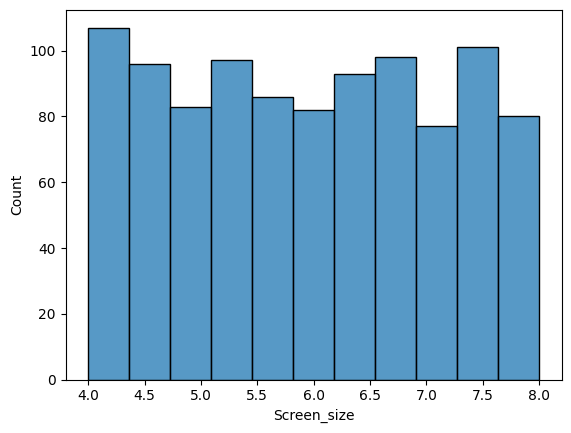

In [22]:
sns.histplot(eda_df['Screen_size'])

Around 4.0 and 7.5 inch are the most preffered screensize among all brands

<Axes: xlabel='Battery_capacity', ylabel='Count'>

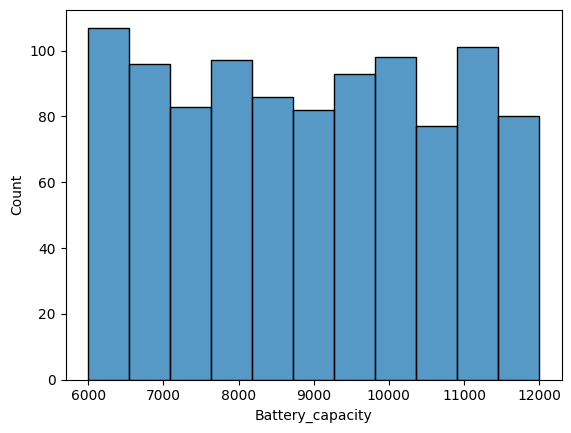

In [23]:
sns.histplot(eda_df['Battery_capacity'])

6000 mah is the most common battery capacity

<Axes: xlabel='Storage_capacity', ylabel='Count'>

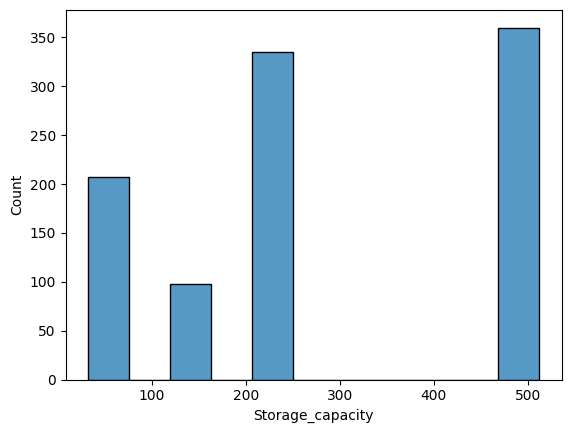

In [24]:
sns.histplot(eda_df['Storage_capacity'])

250 GB is the popular storage capacity

<Axes: xlabel='Price', ylabel='Count'>

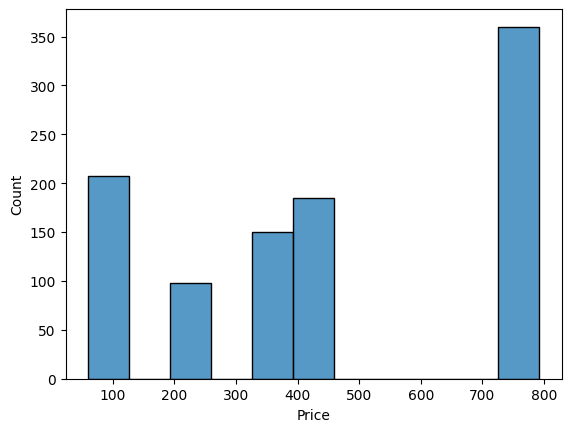

In [25]:
sns.histplot(eda_df['Price'])

300 to 450 dollars is the most preffered price point to purchase mobile phones

<Axes: ylabel='Payment_type'>

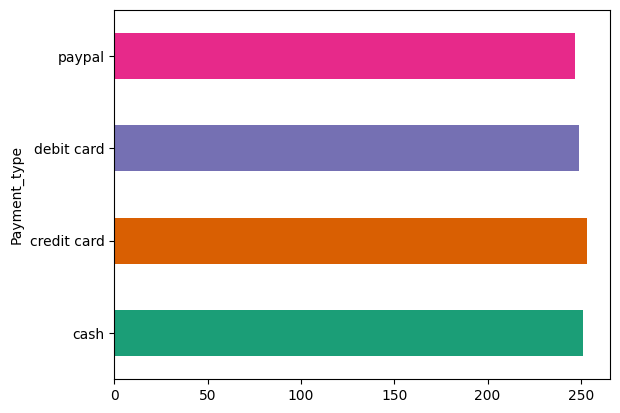

In [26]:
eda_df.groupby('Payment_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

Customers prefer to pay on credit card the most

<Axes: ylabel='Brand_name'>

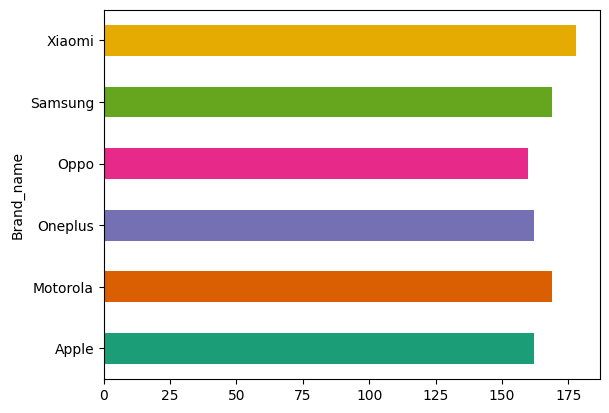

In [27]:
eda_df.groupby('Brand_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

Xiaomi is the most popular mobile phone purchased by customer

<Axes: title={'center': 'Ram_size'}, ylabel='Frequency'>

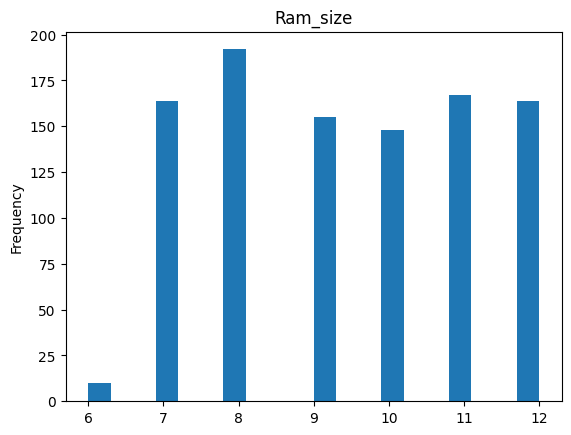

In [28]:
eda_df['Ram_size'].plot(kind='hist', bins=20, title='Ram_size')

8 GB RAM is the most common RAM size preffered by customer

In [66]:
# BIVARIATE ANALYSIS

<Axes: xlabel='month', ylabel='Units_sold'>

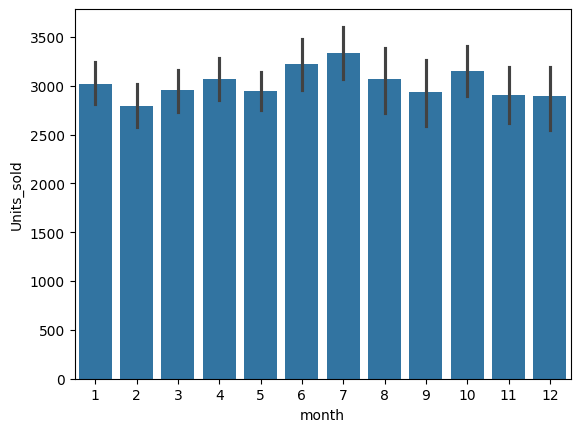

In [29]:
sns.barplot(x=eda_df['month'],y=eda_df['Units_sold'])

In the month of july , mobile phone has sold the most among all months

<Axes: xlabel='year', ylabel='Units_sold'>

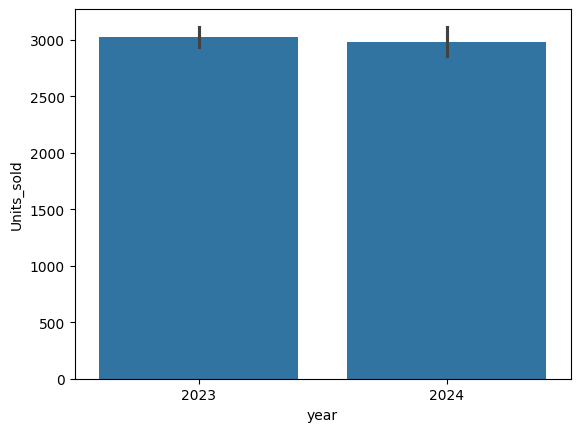

In [30]:
sns.barplot(x=eda_df['year'],y=eda_df['Units_sold'])

though 2024 is still midway, the no of units sold is comparable to 2023

<Axes: xlabel='month', ylabel='Price'>

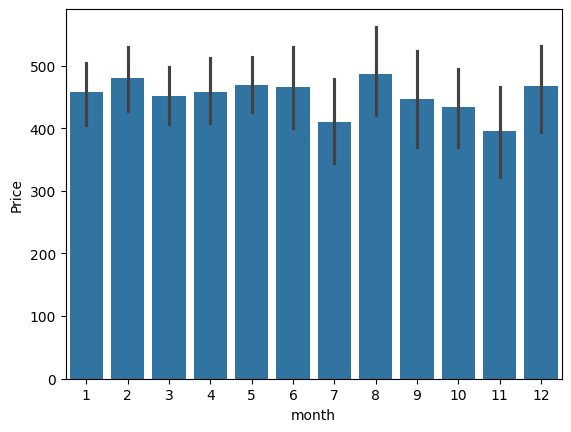

In [31]:
sns.barplot(x=eda_df['month'],y=eda_df['Price'])

Highest priced mobile phone is sold in August

<Axes: xlabel='Brand_name', ylabel='Price'>

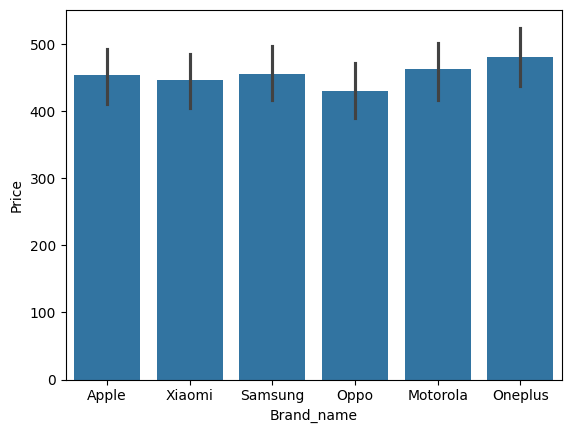

In [32]:
sns.barplot(x=eda_df['Brand_name'],y=eda_df['Price'])

Oneplus has highest priced flagship mobile phone as per the dataset

### HEATMAP

In [35]:
heat_df=eda_df[['Screen_size','Battery_capacity',
       'Ram_size', 'Storage_capacity', 'Price','Units_sold',
       'month', 'year']] # extracting numerical features to check the corelation 

In [36]:
corr=heat_df.corr() # apply corrleation feature on the dataframe

<Axes: >

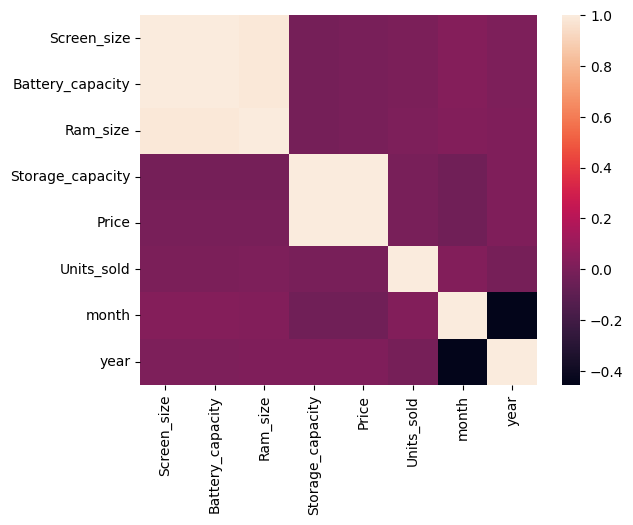

In [37]:
sns.heatmap(corr) #visualise the heatmap 

Screen_size, Battery_capacity, Ram_size are highly correlated with each other

Price and storage capacity are correlated with each other